In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/german_credit_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
pd.set_option("display.max_columns", None)

In [7]:
sns.set_style("whitegrid")

In [8]:
df= pd.read_csv("/kaggle/input/german-credit-data-with-risk/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
df.shape

(1000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [14]:
df["Job"].unique()

array([2, 1, 3, 0])

In [15]:
#check missing values
df.isna()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [17]:
#check duplicate value
df.duplicated().sum()

0

In [18]:
df2= df.dropna().reset_index(drop=True)


In [19]:
df2.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [20]:
df2

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [21]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [22]:
df2.drop(columns= "Unnamed: 0", inplace=True)

In [23]:
df2.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [24]:
df2.shape

(522, 10)

In [25]:
# take all the numeric values
df2[["Age", "Credit amount", "Duration"]]

,Age,Credit amount,Duration
0,22,5951,48
1,45,7882,42
2,53,4870,24
3,35,6948,36
4,28,5234,30
...,...,...,...
517,48,1743,24
518,30,3959,36
519,40,3857,30
520,23,1845,45


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Credit amount'}>],
       [<Axes: title={'center': 'Duration'}>, <Axes: >]], dtype=object)

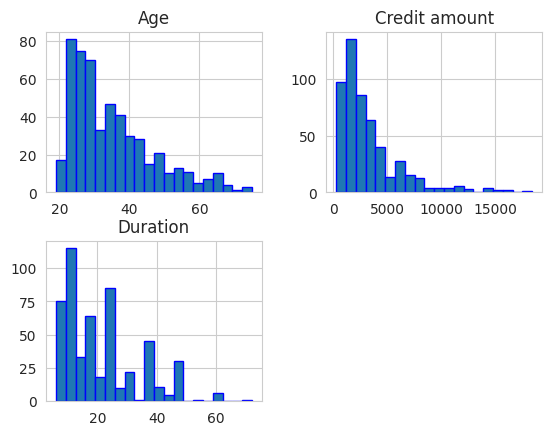

In [26]:
df2[["Age", "Credit amount", "Duration"]].hist(bins=20, edgecolor="blue")

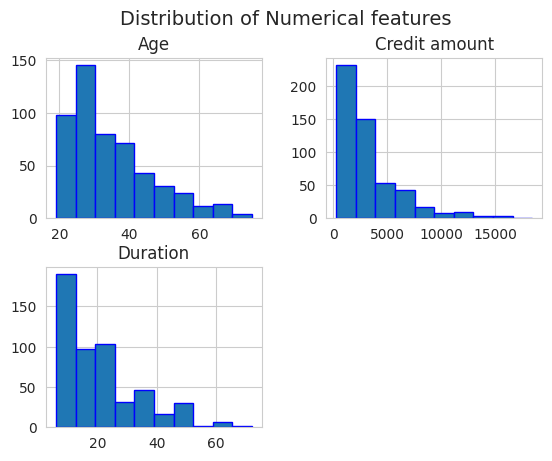

In [27]:
df2[["Age", "Credit amount", "Duration"]].hist(bins=10, edgecolor="blue")
plt.suptitle("Distribution of Numerical features", fontsize=14)
plt.show()

* observation of the above graphs are credit amount and duration are not having normal distribution , data is skweed in left side*
* age is typical of 25 year age, and maximum duration is between 10-20 years

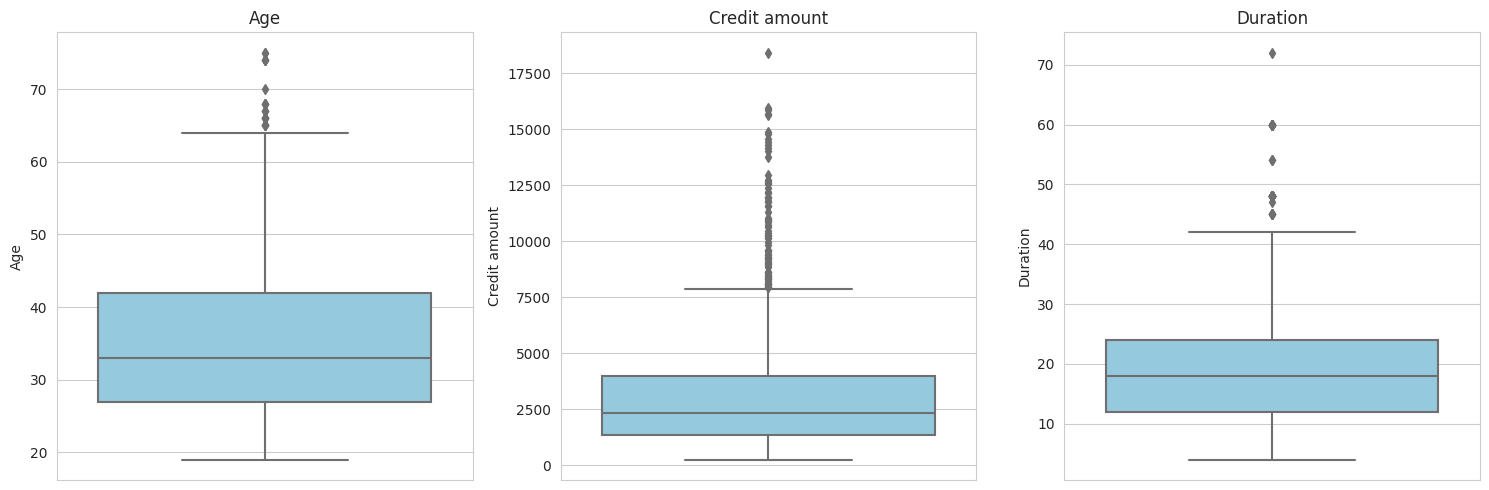

In [28]:
#matplot figure
plt.figure(figsize=(15, 5))
for i , col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color= "skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [29]:
#to check the duration outlier of 70 year
df2.query("Duration >70")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [30]:
df2.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


**Now check the categorical features**

In [31]:
categorical_cols = ["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]


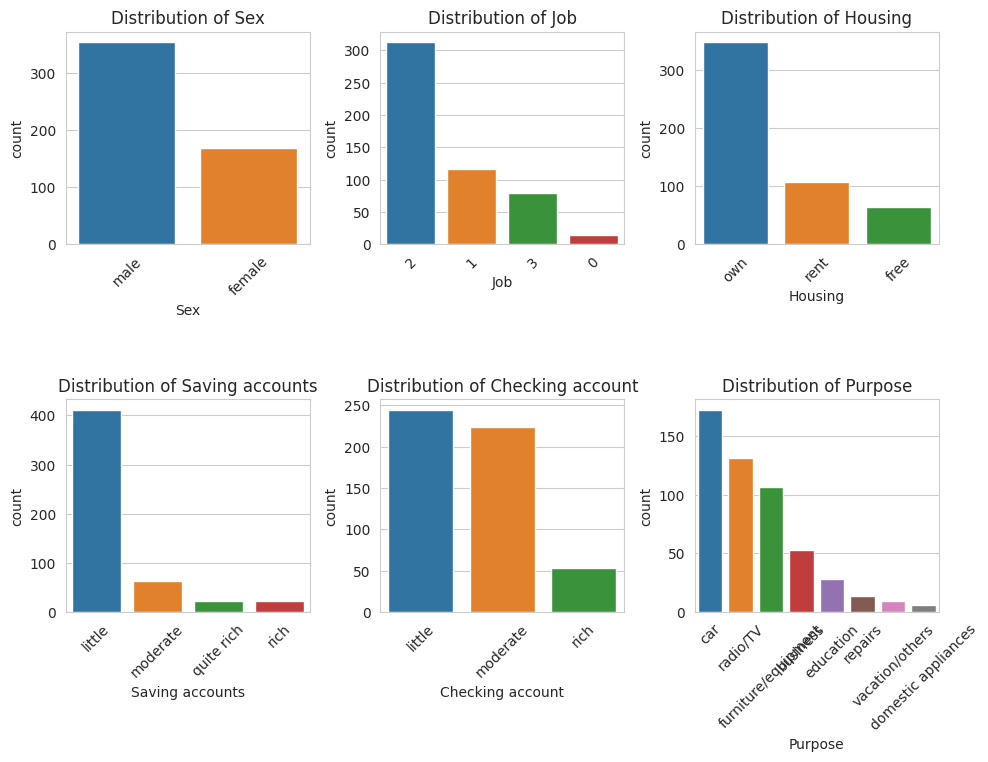

In [32]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df2, x=col,  order=df2[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()
    

In [33]:
#now need to check the correlation 
corr = df2[["Age", "Job", "Credit amount", "Duration"]].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


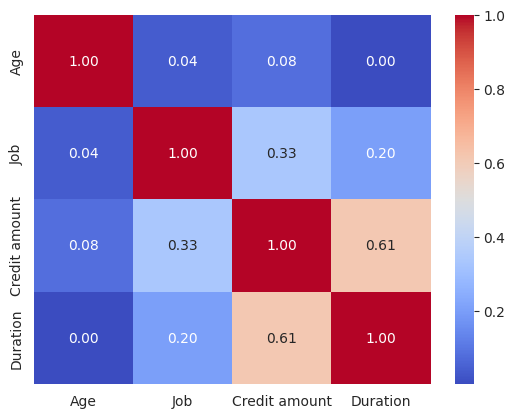

In [34]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

*obervation are 
not much correlation observed 
only high value is 0.62 which says if credit amount increases then duration also increases e.g large amount of loan and longer the duration
there is no negative value also which suggest nothing is inversly correlated

In [35]:
#average credit by job and credit amount

df2.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [36]:
df2.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [37]:
pd.pivot_table(df2, values="Credit amount", index="Housing", columns="Purpose")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


observation
* the person who own the house they are takeing the credit on the vacations
* the person who rent house no need appliances and not much information about vaccation
* free living people are having much expense on car/education/vacations

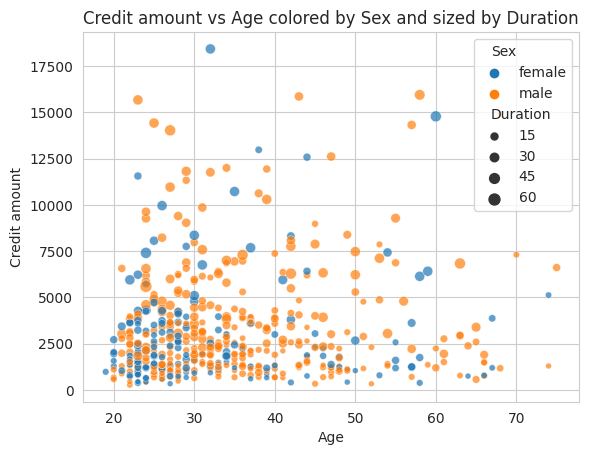

In [38]:
# now lets see the correlation of age, credit amount and duration

sns.scatterplot(data = df2, x="Age", y="Credit amount", hue="Sex",size="Duration", alpha=0.7 )
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

observation 
* higher credit is taken by the people who are above 50
* most of the credit is between age 20-40, and amount 5000

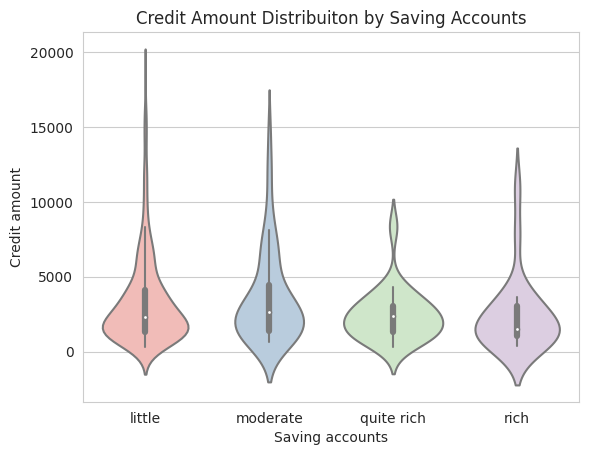

In [39]:
sns.violinplot(data=df2, x="Saving accounts", y="Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribuiton by Saving Accounts")
plt.show()



Obervation
* not much correlation between the saving account vs credit amount
* So far not much information is obervation with all above analysis so now lets check the risk columsn

In [40]:

df2["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

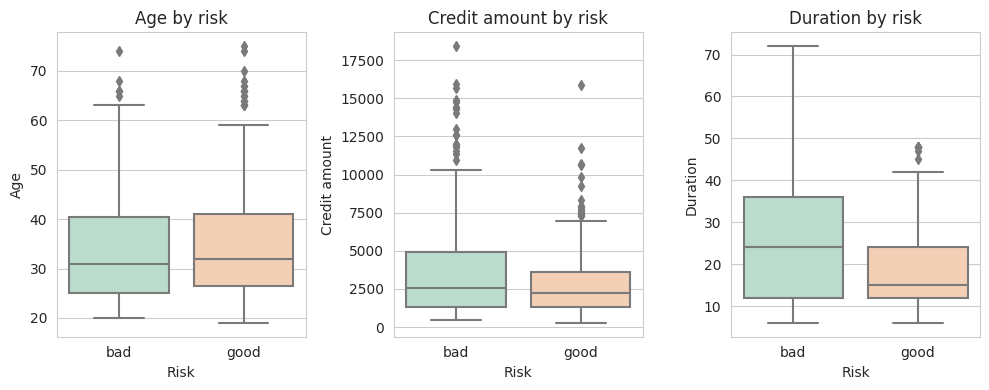

In [41]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1 )
    sns.boxplot(data=df2, x="Risk", y= col, palette="Pastel2")
    plt.title(f"{col} by risk")
plt.tight_layout()   
plt.show()


Obervations
* Age have no effect between good/bad Risk
* bad risk is oberved with higher credit amount as well as longer duration

In [42]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [43]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

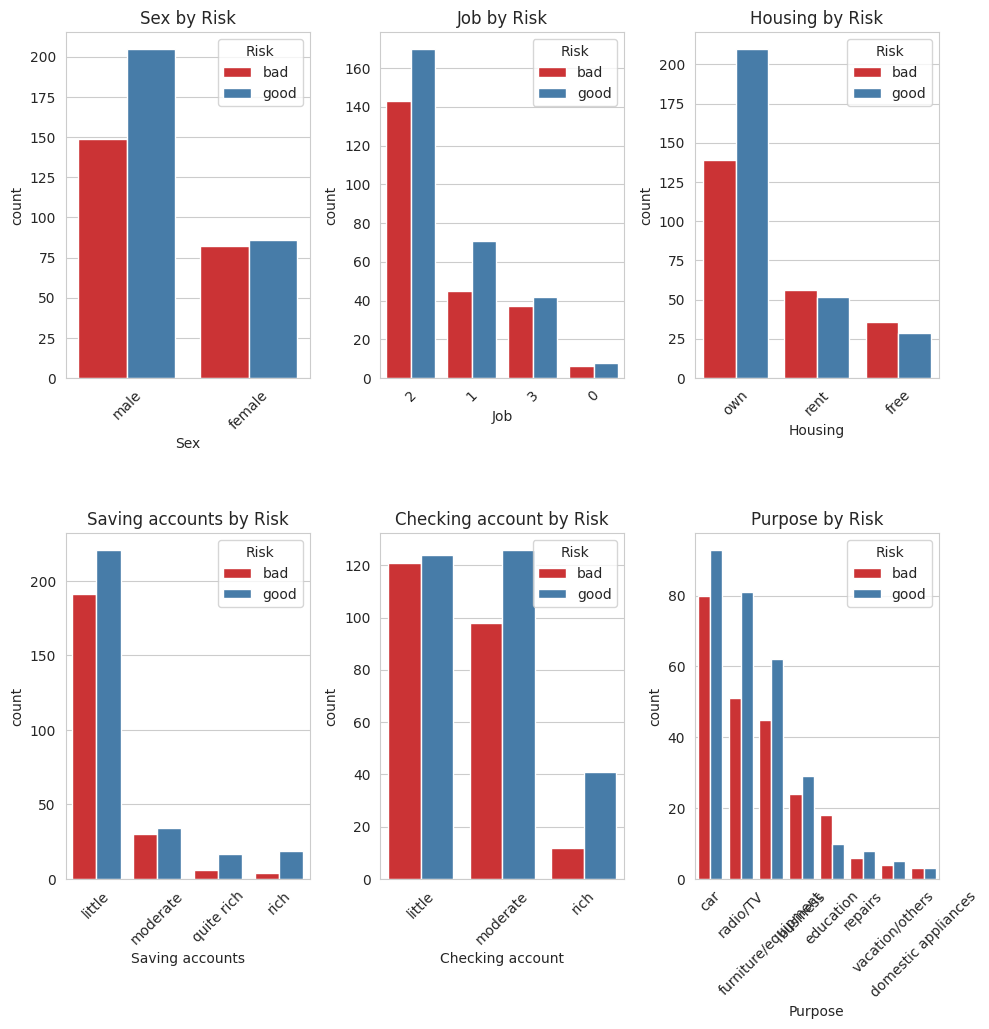

In [44]:
plt.figure(figsize=(10, 14))
for i , col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df2, x=col, hue="Risk", palette="Set1", order=df2[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()   
plt.show()
    
    

Obervations
* the above plots show that Risk is not related to any of the sex, job, housing, accounts or purposes * * (except 5th columns of education)

In [45]:
df2.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [46]:
feature=['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration']
feature

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration']

In [47]:
target=["Risk"]
target

['Risk']

In [48]:
df_model= df2[feature + target].copy()
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


> Using SKLearn for model analysis

In [49]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [51]:
cat_cols=df_model.select_dtypes(include="object").columns.drop("Risk")
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [53]:
le_dict ={}
for col in cat_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")
    

In [54]:
le_dict

{'Sex': LabelEncoder(),
 'Housing': LabelEncoder(),
 'Saving accounts': LabelEncoder(),
 'Checking account': LabelEncoder()}

In [55]:
le_target=LabelEncoder()

In [58]:
target='Risk'

In [59]:
df_model[target]=le_target.fit_transform(df_model[target])

In [61]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [62]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [63]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X=df_model.drop(target, axis=1)
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [67]:
Y=df_model[target]
Y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, stratify=Y, random_state=1)

In [73]:
#X_train.shape
#X_test
#Y_train
Y_test.shape

(105,)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  #CV is for cross validation

In [82]:
def train_model(model, param_grid, X_train, Y_train, X_test, Y_test):
    grid=GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, Y_train)
    best_model= grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    return best_model, acc, grid.best_params_

In [83]:
dt=DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_param_grid={
    "max_depth" : [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf":[1, 2, 4]
}


In [84]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, Y_train, X_test, Y_test)

In [85]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.580952380952381


In [87]:
print("Best parameter", params_dt)

Best parameter {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [89]:
rf=RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
rf_param_grid={
    "n_estimators" : [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1, 2,4]
}

In [90]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, Y_train, X_test, Y_test)

In [91]:
print("Ramdom Forest Accuracy", acc_rf)

Ramdom Forest Accuracy 0.6190476190476191


In [92]:
print("Best parameter", params_rf)

Best parameter {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [94]:
et= ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs=-1)
et_param_grid={
    "n_estimators" : [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1, 2,4]
}

In [95]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, Y_train, X_test, Y_test)

In [97]:
print("Extra Tree Accuracy", acc_et)
print("Best parameter", params_et)

Extra Tree Accuracy 0.6476190476190476
Best parameter {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [105]:
scale_post_weight=(Y_train==0).sum() / (Y_train==1).sum()
scale_post_weight

0.7974137931034483

https://xgboost.readthedocs.io/en/stable/parameter.html

what is xgboost in simple example
* XGBoost like it’s a superhero power-up in your coding game. Imagine you're building a super-smart robot that predicts whether your friend will win or lose a video game based on how they play.

* Real-Life Example: Predicting Game Wins You and your friends play a game. You notice:Some players practice a lot → usually win.
Some play late at night → get tired → lose.
Some use a cool skin → feel confident → win more.

* You want to build a robot predictor that looks at a player’s stats and says:
"This player has 80% chance to WIN!"That’s what XGBoost does — it’s a super-powered prediction machine!So, What IS XGBoost?XGBoost = Extreme Gradient BoostingIt’s like a team of weak guessing robots that work together to become a super genius.Think of it like this:Robot #1 looks at the data and guesses:
"If you practice > 5 hours, you probably win."
→ It’s okay, but makes some mistakes.
Robot #2 comes in and says:
"Hey, Robot #1 missed some tired players! Let me fix that."
→ Focuses on the mistakes.
Robot #3, #4, #5... keep fixing the errors of the ones before.

By the end, the whole team makes an amazing prediction!



In [119]:
xgb=XGBClassifier(random_state=1, scale_pos_weight=scale_post_weight, use_label_encoder=False, eval_metric="logloss")
xgb_param_grid={
    "n_estimators" : [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1],
    "colsample_bytree":[0.7, 1]
}

In [120]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, Y_train, X_test, Y_test)

In [121]:
print("XGB Accuracy", acc_xgb)
print("Best parameter", params_xgb)

XGB Accuracy 0.6666666666666666
Best parameter {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [122]:
print("Decision Tree Accuracy", acc_dt)
print("Ramdom Forest Accuracy", acc_rf)
print("Extra Tree Accuracy", acc_et)
print("XGB Accuracy", acc_xgb)

Decision Tree Accuracy 0.580952380952381
Ramdom Forest Accuracy 0.6190476190476191
Extra Tree Accuracy 0.6476190476190476
XGB Accuracy 0.6666666666666666


In [124]:
best_xgb.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [125]:
joblib.dump(best_xgb, "XGB_model.pkl")

['XGB_model.pkl']